In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

np.random.seed(0)
# 定义函数
def true_function(x):
    return tf.math.sin(x)
#     return x*2

# 采样数据
train_size = 1000
test_size = 200

# 采样范围
train_x = np.random.uniform(-5, 5, train_size).astype(np.float32)
test_x = np.random.uniform(-5, 5, test_size).astype(np.float32)

# 将采样的数据转换为2维形状
train_x = train_x.reshape(-1, 1)
test_x = test_x.reshape(-1, 1)

# 计算标签
train_y = true_function(train_x)
test_y = true_function(test_x)

print("训练集特征形状:", train_x.shape)
print("测试集特征形状:", test_x.shape)
print("训练集标签形状:", train_y.shape)
print("测试集标签形状:", test_y.shape)

训练集特征形状: (1000, 1)
测试集特征形状: (200, 1)
训练集标签形状: (1000, 1)
测试集标签形状: (200, 1)


In [20]:
class myModel:
    def __init__(self):
        ####################
        '''声明模型对应的参数'''
        ####################
        self.W1 = tf.Variable(tf.random.normal([1, 128]), name='W1')
        self.b1 = tf.Variable(tf.zeros([128]), name='b1')
        self.W2 = tf.Variable(tf.random.normal([128, 1]), name='W2')
        self.b2 = tf.Variable(tf.zeros([1]), name='b2')
    def __call__(self, x):
        ####################
        '''实现模型函数体，返回未归一化的logits'''
        ####################
        h1 = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
        y_pred = tf.matmul(h1, self.W2) + self.b2
        return y_pred
        
model = myModel()

optimizer = optimizers.Adam()

In [21]:
@tf.function
def compute_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y - y_pred))

@tf.function
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = compute_loss(y_pred, y)

    # compute gradient
    trainable_vars = [model.W1, model.W2, model.b1, model.b2]
    grads = tape.gradient(loss, trainable_vars)
#     optimizer.apply_gradients(zip(grads, trainable_vars))
    for g, v in zip(grads, trainable_vars):
        v.assign_sub(0.001*g)

#     for g, v in zip(grads, trainable_vars):
#         v.assign_sub(0.01*g)

    return loss

@tf.function
def test(model, x, y):
    y_pred = model(x)
    loss = compute_loss(y_pred, y)
    return loss

In [22]:
for epoch in range(6000):
    loss = train_one_step(model, optimizer, 
                                    tf.constant(train_x, dtype=tf.float32), 
                                    tf.constant(train_y, dtype=tf.float32))
    if epoch % 1000 == 0:
        print('epoch', epoch, ': loss', loss.numpy())
loss = test(model, tf.constant(test_x, dtype=tf.float32), tf.constant(test_y, dtype=tf.float32))

print('test loss', loss.numpy())
# for epoch in range(50):
#     train_loss = train_one_step(model, optimizer, 
#                                 tf.constant(train_x, dtype=tf.float32), 
#                                 tf.constant(train_y, dtype=tf.float32))
# test_loss = test(model, 
#                 tf.constant(test_x, dtype=tf.float32), 
#                 tf.constant(test_y, dtype=tf.float32))
# print('epoch', epoch, ': train loss', train_loss.numpy(), '; test loss', test_loss.numpy())


epoch 0 : loss 418.22836
epoch 1000 : loss 0.1077287
epoch 2000 : loss 0.05339888
epoch 3000 : loss 0.02557661
epoch 4000 : loss 0.0171903
epoch 5000 : loss 0.013338562
test loss 0.01406639


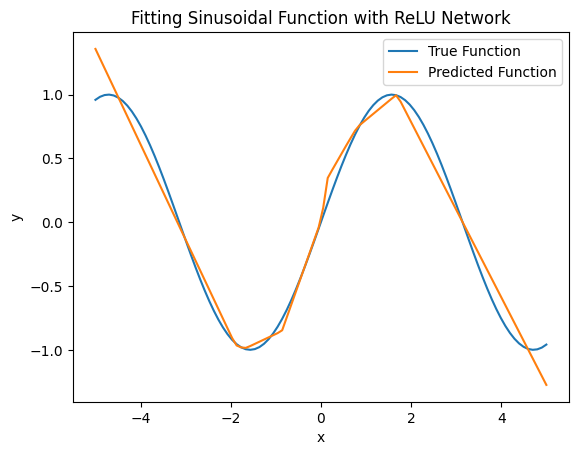

In [23]:
# 绘制拟合效果
x_values = np.linspace(-5, 5, 100)
x_values = tf.reshape(x_values, (-1, 1))
x_values = tf.cast(x_values, dtype=tf.float32)
y_pred = model(x_values)
plt.plot(x_values, true_function(x_values), label='True Function')
plt.plot(x_values, y_pred, label='Predicted Function')
# plt.scatter(train_x, train_y, color='red', label='Training Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting Sinusoidal Function with ReLU Network')
plt.show()